# Exercises

## Numerical Python

### Plotting a function

- Define a vector `x` with 1000 regularly spaced elements between 0 and 10

In [1]:
import numpy as np
x = np.linspace(0,10, 1000)

- Define a vector `y` representing $y=sin(x)$

In [2]:
y = np.sin(x)

- Define a vector `y1` representing $y=abs(sin(x))$

In [3]:
y1 = np.abs(np.sin(x))

- Define a vector `y2` representing $y=sin(x) \text{if} y>0.1 \text{else} 0.1$

In [4]:
cond = (y>0.1)

In [5]:
y2 = np.sin(x)*cond + 0.1*(~cond)

- Plot `y`, `y1`, `y2` against x

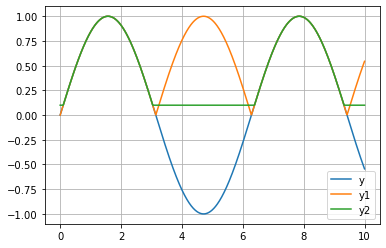

In [6]:
from matplotlib import pyplot as plt

plt.plot(x,y, label="y")
plt.plot(x,y1, label='y1')
plt.plot(x,y2, label='y2')
plt.grid(True)
plt.legend(loc='lower right')

### Autocorrelated process

- Set `T=100`, `rho=0.9`, `sigma=0.01`. We consider an autoregressive process $x_t=\rho x_{t-1} + \epsilon_t$
where $\epsilon_t$ is normally distributed with standard deviation $\sigma$

In [7]:
T = 100
rho = 0.9
sigma = 0.01

- Create an empty vector `x = np.zeros(T)`

In [8]:
import numpy as np
x = np.zeros(T)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Loop over `t>0` and fill `x[t]` so that `x` represents a simulation for `t` periods of process $x_t$ 

In [9]:
np.random.normal(scale=sigma)
np.random.randn()*sigma

-0.012179445299749143

In [10]:
for t in range(1, T):
    # press tabulation to indent
    ϵ = np.random.randn()*sigma # random normal variable with standard deviation sigma (google numpy random variable)
    x[t] = rho*x[t-1] + ϵ

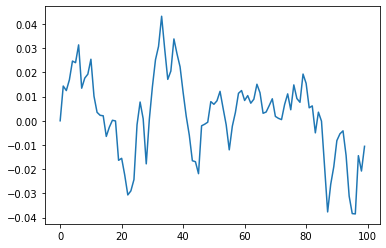

In [11]:
from matplotlib import pyplot as plt
plt.plot(x)

- Use function `hpfilter` from statsmodels (google it). It returns a and a residual

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cycle, trend = hpfilter(x)

#cycle is residual

- Plot the simulated series, the filtered series and the residual

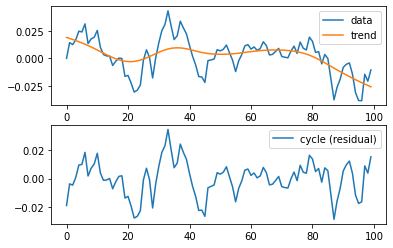

In [13]:

plt.subplot(2,1,1)
plt.plot(x, label='data')
plt.plot(trend, label='trend')
plt.legend()
plt.subplot(2,1,2)
plt.plot(cycle, label='cycle (residual)')
plt.legend()

## Iris Data Set

You will need the library `vega_datasets` and the `altair` library. You can install them with `!pip install vega_datasets` and `!pip install altair`
Load the `iris` database.

In [14]:
# uncomment and run the following if vega_datasets is not already installed
# !pip install vega_datasets # on linux
# pip install vega_datasets # try if the former doesn't work

In [15]:
# uncomment and run the following if altair is not already installed
#!pip install altair

- Print statistics (mean, std), by flower, for each characteristics.

In [16]:
# we start by importing the library
import vega_datasets

In [17]:
df = vega_datasets.data.iris()
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
# we can print a summary for the whole database
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# but this mixes all kinds of flowers
# here is how we do it for the 'setosa' type:
df[df['species']=='setosa'].describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [22]:
# or we can print the statistics for all species (here we do it for the mean)
for spec in ['setosa', 'virginica', 'versicolor']:
    print(f"\nMean for: '{spec}'")
    m = df[df['species']==spec].mean()
    print(m)


Mean for: 'setosa'
sepalLength    5.006
sepalWidth     3.428
petalLength    1.462
petalWidth     0.246
dtype: float64

Mean for: 'virginica'
sepalLength    6.588
sepalWidth     2.974
petalLength    5.552
petalWidth     2.026
dtype: float64

Mean for: 'versicolor'
sepalLength    5.936
sepalWidth     2.770
petalLength    4.260
petalWidth     1.326
dtype: float64


In [23]:
# the same result can be obtained using pandas' groubpy function
df.groupby('species').apply( lambda x: x.mean())


,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [24]:
# same for the standard deviation
df.groupby('species').apply( lambda x: x.std())

,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [25]:
# we can get all statistics at once, by group, with .describe
df.groupby('species').apply( lambda x: x.describe())

sepalLength  sepalWidth  petalLength  petalWidth
species                                                           
setosa     count    50.000000   50.000000    50.000000   50.000000
           mean      5.006000    3.428000     1.462000    0.246000
           std       0.352490    0.379064     0.173664    0.105386
           min       4.300000    2.300000     1.000000    0.100000
           25%       4.800000    3.200000     1.400000    0.200000
           50%       5.000000    3.400000     1.500000    0.200000
           75%       5.200000    3.675000     1.575000    0.300000
           max       5.800000    4.400000     1.900000    0.600000
versicolor count    50.000000   50.000000    50.000000   50.000000
           mean      5.936000    2.770000     4.260000    1.326000
           std       0.516171    0.313798     0.469911    0.197753
           min       4.900000    2.000000     3.000000    1.000000
           25%       5.600000    2.525000     4.000000    1.200000
           50%       5.900000    2.800000     4.350000    1.300000
           75%       6.300000    3.000000     4.600000    1.500000
           max       7.000000    3.400000     5.100000    1.800000
virginica  count    50.000000   50.000000    50.000000   50.000000
           mean      6.588000    2.974000     5.552000    2.026000
           std       0.635880    0.322497     0.551895    0.274650
           min       4.900000    2.200000     4.500000    1.400000
           25%       6.225000    2.800000     5.100000    1.800000
           50%       6.500000    3.000000     5.550000    2.000000
           75%       6.900000    3.175000     5.875000    2.300000
           max       7.900000    3.800000     6.900000    2.500000

- Use matplotlib to make *correlation plots*, betwen flowers characteristics. (for instance, plot `sepalWidth` against `sepalLength`. Ideally, use different shapes or colors for various flowers.

First, let's do the correlation plot for one pair of two characteristics and one species type.

In [11]:
# we need to import the plotting library:
from matplotlib import pyplot as plt

Text(0, 0.5, 'sepalWidth')

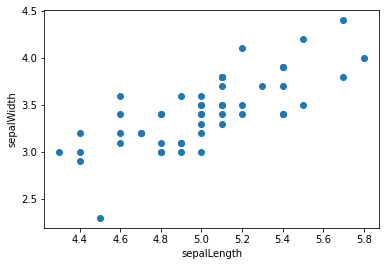

In [27]:
# we do it for setosa
ddf = df[df['species']=='setosa'] # extract subdataframe where species=='setosa'
plt.plot(ddf['sepalLength'], ddf['sepalWidth'], 'o', label=spec)
plt.xlabel("sepalLength")
plt.ylabel("sepalWidth")

Here is how we can plot the same plot for all species on the same graph.
Not that matplotlib chooses a new color by default, for each new call to function `plot()`

In [28]:
# let's get a list of all species
species = df['species'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

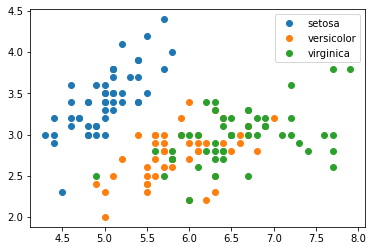

In [29]:
for spec in species:
    ddf = df[df['species']==spec]
    plt.plot(ddf['sepalLength'], ddf['sepalWidth'], 'o', label=spec)
plt.legend()

Now we can produce the full graph. We use the `subplots` function to arrange the graphs on a 4x4 grid.

In [30]:
# we compute the list of characteristics from the columns of the tables 
characteristics = df.columns[:4] # we ignore the 5th column which is 'species'
characteristics

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'], dtype='object')

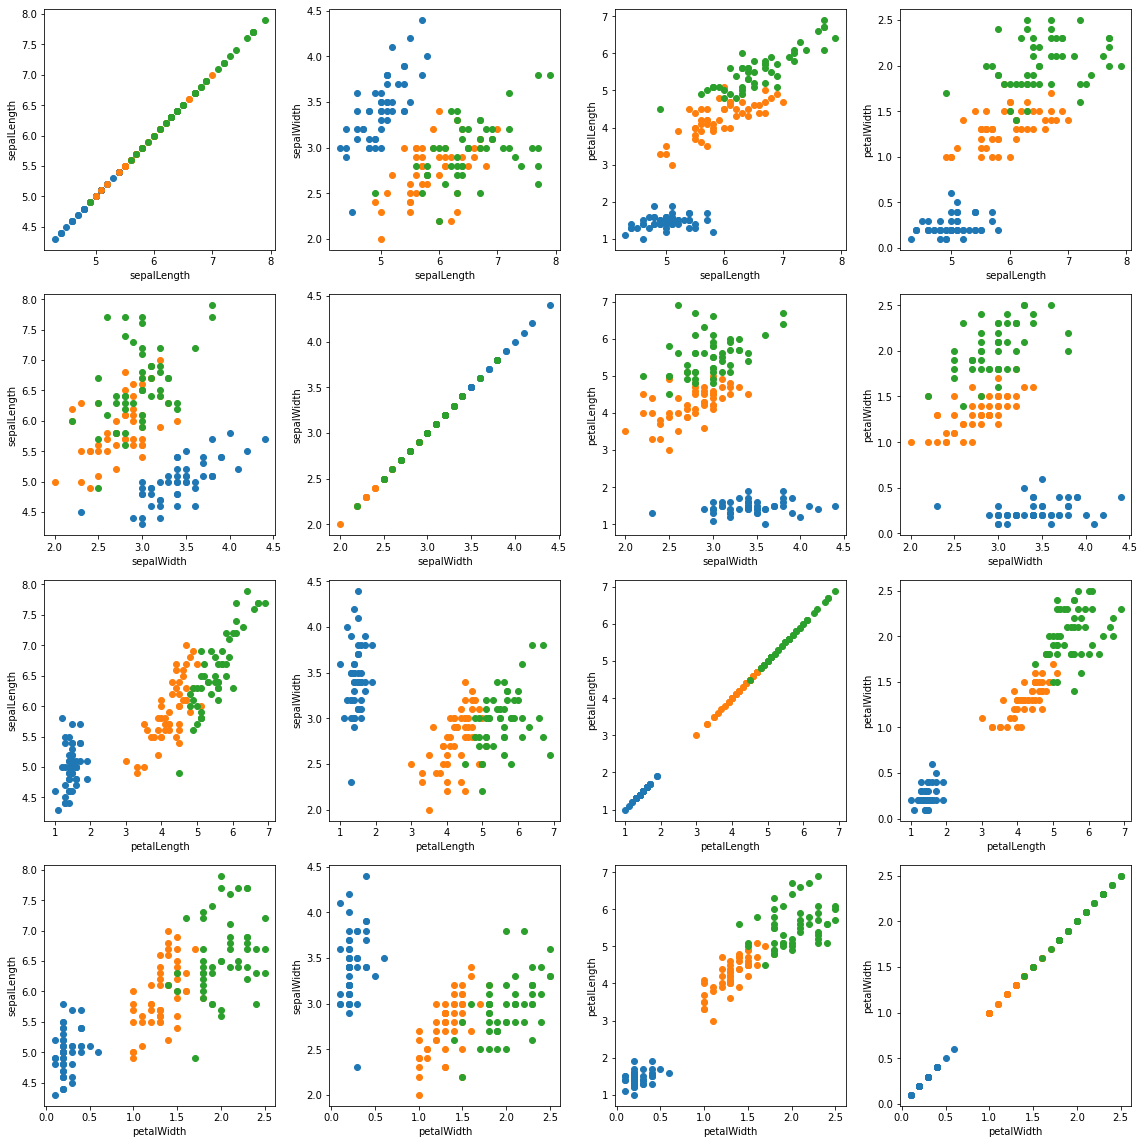

In [31]:
plt.figure(figsize=(16,16))
# we loop over lines (i from 0 to 3)
for i in range(4):
    ch_i = characteristics[i]
    # we loop over columns (j from 0 to 3)
    for j in range(4):
        ch_j = characteristics[j]

        # create the subplot 
        # we compute the position of the current subplot (goes from 1 to 16)
        position = i*4 + j + 1
        plt.subplot(4, 4, position)
        for spec in species:
            ddf = df[df['species']==spec]
            plt.plot(ddf[ch_i], ddf[ch_j], 'o', label=spec)
            plt.xlabel(ch_i)
            plt.ylabel(ch_j)
plt.tight_layout()
#         plt.legend()

- Convert the database to *long* format

In [37]:
df_long = df.melt(value_vars=['sepalLength','sepalWidth','petalLength','petalWidth'], 
                  id_vars="species" )
df_long.head()

,species,variable,value
0,setosa,sepalLength,5.1
1,setosa,sepalLength,4.9
2,setosa,sepalLength,4.7
3,setosa,sepalLength,4.6
4,setosa,sepalLength,5.0


- Use altair, to plot correlation between two characteristics, with different color for each flower. Plot all correlations.

An introduction about how to use altair is on youtube:
[Altair](https://www.youtube.com/watch?v=ms29ZPUKxbU)
Otherwise, the online [doc](https://altair-viz.github.io/) is very useful and complete. It has many demos that can be adapted to your need: [demos](https://altair-viz.github.io/gallery/)

In [38]:
import altair as alt

In [39]:
ch = alt.Chart(df).mark_point().encode(
    x='sepalWidth',
    y='petalWidth',
    color='species',
)
ch

alt.Chart(...)

To plot all correlations, best practice is to use altair's `repeat` function. Note that the result is an interactive graph where all subplots move in a synchronized way. This is a typical feature of "visualization" libraries.

In [40]:
alt.Chart(df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['petalLength', 'petalWidth','sepalLength', 'sepalWidth'],
    column=['petalLength', 'petalWidth','sepalLength', 'sepalWidth']
).interactive()

alt.RepeatChart(...)

## Philips Curve and Okun's Law

If needed, install dbnomics with `!pip install dbnomics`.

- Download inflation, unemployment and gdp series from France.

There is a clear tutorial on how to use dbnomics available from [Quantecon](https://notes.quantecon.org/submission/5bd32515f966080015bafbcd).
There are two ways to import a dbnomics series:

- use api link
- use the organization/database/series identifiers

Download with the API was broken when we tried in class (the website returned an incorrect json file), so we will use the second method. (**update**: this seems to be fixed now)

On the dbnomics website we search for "inflation france" and decide to use OECD database. We eventually obtain the following page:

![](screenshot.png)

From this page we obtain the series identifier: `OECD/MEI/FRA.CPALTT01.CTGY.M`

It is split in three parts:
- organization:  OECD
- database: KEY (Key Economic Indicators)
- series: CPALTT01.FRA.GY.A

We use these elements to import a series with dbnomics:

In [5]:
import dbnomics
df_inflation = dbnomics.fetch_series('OECD', 'KEI', 'CPALTT01.FRA.GY.A')
df_inflation.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,SUBJECT,LOCATION,MEASURE,FREQUENCY,Subject,Country,Measure,Frequency
0,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1956,1956-01-01,1.897315,1.897315,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
1,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1957,1957-01-01,3.057669,3.057669,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
2,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1958,1958-01-01,15.260526,15.260526,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
3,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1959,1959-01-01,5.815255,5.815255,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
4,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1960,1960-01-01,4.139938,4.139938,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual


In [6]:
# equivalent:
# df_inflation = dbnomics.fetch_series_by_api_link(...)
# df_inflation

In [7]:
# let's check it is not empty:
df_inflation.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,SUBJECT,LOCATION,MEASURE,FREQUENCY,Subject,Country,Measure,Frequency
0,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1956,1956-01-01,1.897315,1.897315,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
1,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1957,1957-01-01,3.057669,3.057669,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
2,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1958,1958-01-01,15.260526,15.260526,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
3,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1959,1959-01-01,5.815255,5.815255,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual
4,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1960,1960-01-01,4.139938,4.139938,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual


In [9]:
# we see the column associated with the values is called 'value'
# the one associated with date is called `period`
display( df_inflation['value'].head() )
display( df_inflation['period'].head() )

0     1.897315
1     3.057669
2    15.260526
3     5.815255
4     4.139938
Name: value, dtype: float64

0   1956-01-01
1   1957-01-01
2   1958-01-01
3   1959-01-01
4   1960-01-01
Name: period, dtype: datetime64[ns]

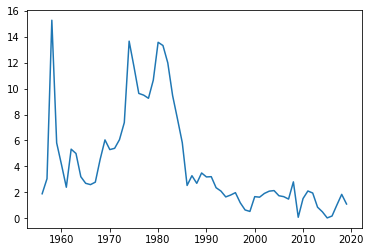

In [12]:
plt.plot(df_inflation['period'],df_inflation['value'])

We follow the same steps for unemployment and gdp. For the sake of simplicity, we choose annual frequency for all series.
Not that the series on unemployment starts on only in 2004. That will be enough for the current purpose.

In [13]:
# we proceed similarly for unemployment and gdp
df_gdp = dbnomics.fetch_series('OECD', 'MEI', 'FRA.NAEXCP01.STSA.A')
df_unemployment = dbnomics.fetch_series('OECD', 'CSPCUBE', 'UNEMPLRT_T1C.FRA')

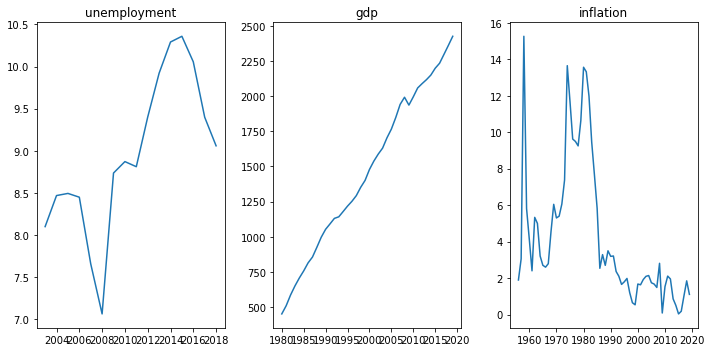

In [14]:
# let's look at what we have
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(df_unemployment['period'], df_unemployment['value'])
plt.title('unemployment')
plt.subplot(132)
plt.plot(df_gdp['period'], df_gdp['value'])
plt.title('gdp')
plt.subplot(133)
plt.plot(df_inflation['period'], df_inflation['value'])
plt.title("inflation")
plt.tight_layout()

In [15]:
# before we proceed, let's create some new columns to avoid conflicts
df_inflation['inflation'] = df_inflation['value']
df_inflation.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,SUBJECT,LOCATION,MEASURE,FREQUENCY,Subject,Country,Measure,Frequency,inflation
0,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1956,1956-01-01,1.897315,1.897315,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,1.897315
1,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1957,1957-01-01,3.057669,3.057669,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,3.057669
2,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1958,1958-01-01,15.260526,15.260526,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,15.260526
3,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1959,1959-01-01,5.815255,5.815255,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,5.815255
4,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.FRA.GY.A,Consumer prices: all items – France – Growth o...,1960,1960-01-01,4.139938,4.139938,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,4.139938


In [16]:
df_gdp['gdp'] = df_gdp['value']
df_unemployment['unemployment'] = df_unemployment['value']

In [17]:
# the following table contains both gdp and inflation
# note that when there was any ambiguity_x suffixes were added to the gdp table, and _y suffixes added to inflation table
# this is why we added another column with the good name.
# as for the period column, since it had the same meaning for both tables, it is not renamed
ddf = df_gdp.merge(df_inflation, on='period')
ddf.head()

,@frequency_x,provider_code_x,dataset_code_x,dataset_name_x,series_code_x,series_name_x,original_period_x,period,original_value_x,value_x,...,value_y,SUBJECT_y,LOCATION_y,MEASURE_y,FREQUENCY_y,Subject_y,Country_y,Measure_y,Frequency_y,inflation
0,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,1980,1980-01-01,451.772,451.772,...,13.562578,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,13.562578
1,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,1981,1981-01-01,509.984,509.984,...,13.314400,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,13.314400
2,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,1982,1982-01-01,585.990,585.990,...,11.978476,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,11.978476
3,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,1983,1983-01-01,650.514,650.514,...,9.459548,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,9.459548
4,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,1984,1984-01-01,707.030,707.030,...,7.673803,CPALTT01,FRA,GY,A,Consumer prices: all items,France,Growth on the same period of the previous year,Annual,7.673803


In [18]:
ddf.columns

Index(['@frequency_x', 'provider_code_x', 'dataset_code_x', 'dataset_name_x',
       'series_code_x', 'series_name_x', 'original_period_x', 'period',
       'original_value_x', 'value_x', 'LOCATION_x', 'SUBJECT_x', 'MEASURE_x',
       'FREQUENCY_x', 'Country_x', 'Subject_x', 'Measure_x', 'Frequency_x',
       'gdp', '@frequency_y', 'provider_code_y', 'dataset_code_y',
       'dataset_name_y', 'series_code_y', 'series_name_y', 'original_period_y',
       'original_value_y', 'value_y', 'SUBJECT_y', 'LOCATION_y', 'MEASURE_y',
       'FREQUENCY_y', 'Subject_y', 'Country_y', 'Measure_y', 'Frequency_y',
       'inflation'],
      dtype='object')

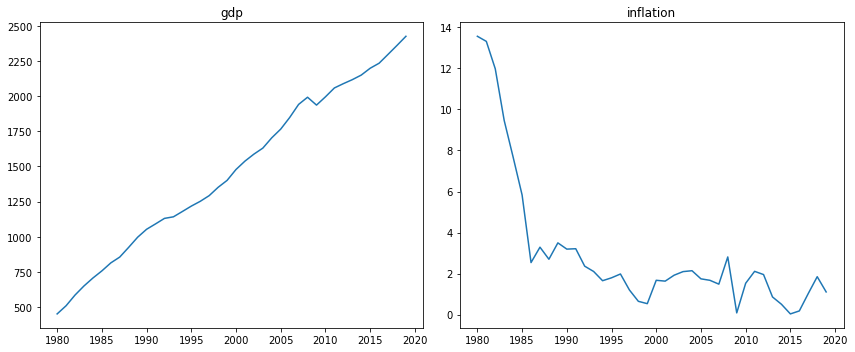

In [19]:
# plot time series:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(ddf['period'], ddf['gdp'])
plt.title("gdp")
plt.subplot(122)
plt.plot(ddf['period'], ddf['inflation'])
plt.title('inflation')
plt.tight_layout()

In [20]:
# let's add unemployment too
ddf = ddf.merge(df_unemployment, on='period')
ddf.head()

,@frequency_x,provider_code_x,dataset_code_x,dataset_name_x,series_code_x,series_name_x,original_period_x,period,original_value_x,value_x,...,series_code,series_name,original_period,original_value,value,SUB,LOCATION,Subject,Country,unemployment
0,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,2003,2003-01-01,1630.666,1630.666,...,UNEMPLRT_T1C.FRA,Unemployment rates: total – France,2003,8.099563,8.099563,UNEMPLRT_T1C,FRA,Unemployment rates: total,France,8.099563
1,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,2004,2004-01-01,1704.017,1704.017,...,UNEMPLRT_T1C.FRA,Unemployment rates: total – France,2004,8.468398,8.468398,UNEMPLRT_T1C,FRA,Unemployment rates: total,France,8.468398
2,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,2005,2005-01-01,1765.903,1765.903,...,UNEMPLRT_T1C.FRA,Unemployment rates: total – France,2005,8.493855,8.493855,UNEMPLRT_T1C,FRA,Unemployment rates: total,France,8.493855
3,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,2006,2006-01-01,1848.150,1848.150,...,UNEMPLRT_T1C.FRA,Unemployment rates: total – France,2006,8.449007,8.449007,UNEMPLRT_T1C,FRA,Unemployment rates: total,France,8.449007
4,annual,OECD,MEI,Main Economic Indicators Publication,FRA.NAEXCP01.STSA.A,France – National Accounts > GDP by Expenditur...,2007,2007-01-01,1941.361,1941.361,...,UNEMPLRT_T1C.FRA,Unemployment rates: total – France,2007,7.658579,7.658579,UNEMPLRT_T1C,FRA,Unemployment rates: total,France,7.658579


In [21]:
# let's keep only what we need
ddf = ddf[['period', 'inflation', 'gdp', 'unemployment']]

In [22]:
# let the period be the index of the dataframe
ddf.index = ddf['period']
ddf.head()

,period,inflation,gdp,unemployment
period,,,,
2003-01-01,2003-01-01,2.098472,1630.666,8.099563
2004-01-01,2004-01-01,2.142090,1704.017,8.468398
2005-01-01,2005-01-01,1.745869,1765.903,8.493855
2006-01-01,2006-01-01,1.675124,1848.150,8.449007
2007-01-01,2007-01-01,1.487998,1941.361,7.658579


In [23]:
# to keep things tidy, we can remove the period column
ddf = ddf.drop(columns=['period'])
ddf.head()

,inflation,gdp,unemployment
period,,,
2003-01-01,2.098472,1630.666,8.099563
2004-01-01,2.142090,1704.017,8.468398
2005-01-01,1.745869,1765.903,8.493855
2006-01-01,1.675124,1848.150,8.449007
2007-01-01,1.487998,1941.361,7.658579


Now we've got a nice, easy to use, dataframe !

- Compute growth rate of gdp.

In [94]:
#a new series with the observations from period before can be obtained using .shift()(
# note the missing value for the initial date
ddf.shift(1).head()

,inflation,gdp,unemployment
period,,,
2003-01-01,NaN,NaN,NaN
2004-01-01,2.098472,1630.666,8.099563
2005-01-01,2.142090,1704.017,8.468398
2006-01-01,1.745869,1765.903,8.493855
2007-01-01,1.675124,1848.150,8.449007


In [24]:
# now we can compute growth rates
ddf['gdp_growth'] = (ddf['gdp']-ddf['gdp'].shift(1))/(ddf['gdp'].shift(1))*100

In [96]:
ddf['gdp_growth'].head()

period
2003-01-01         NaN
2004-01-01    4.498223
2005-01-01    3.631771
2006-01-01    4.657504
2007-01-01    5.043476
Name: gdp_growth, dtype: float64

- Plot two graphs two verify graphically the Phillips curve (unemployment against inflation) and Okun's law (unemployment against output).

In [97]:
ddf.columns

Index(['inflation', 'gdp', 'unemployment', 'gdp_growth'], dtype='object')

Text(0.5, 1.0, 'Phillips curve (2004-2020)')

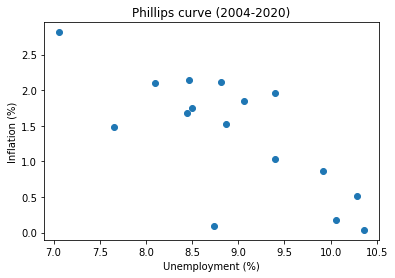

In [25]:
plt.plot(ddf['unemployment'], ddf['inflation'], 'o')
plt.xlabel("Unemployment (%)")
plt.ylabel("Inflation (%)")
plt.title("Phillips curve (2004-2020)")

Without any econometric, work, it would seem that the Phillips relationship holds pretty well in France from 2004 to 2020.

Text(0.5, 1.0, "Okun's law (France: 2004-2020)")

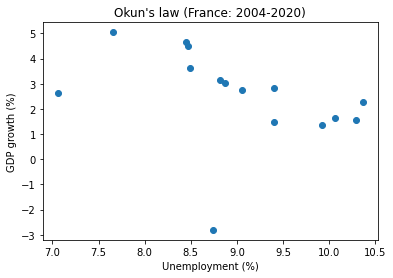

In [100]:
plt.plot(ddf['unemployment'], ddf['gdp_growth'], 'o')
plt.xlabel("Unemployment (%)")
plt.ylabel("GDP growth (%)")
plt.title("Okun's law (France: 2004-2020)")

As for Okun's law, again, the negeative relationship between GDP growth and unemployment holds fairly well, save for one very abnormal point.

- Bonus:  alternative solution to import the data

It is possible to import all series at once, by supplying all identifiers to the 'fetch_series' method.

In [26]:
full_df = dbnomics.fetch_series(['OECD/KEI/CPALTT01.USA.GP.A', 'OECD/MEI/FRA.NAEXCP01.STSA.A', 'OECD/CSPCUBE/UNEMPLRT_T1C.FRA'])
full_df.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,...,Subject,Country,Subject,Country,Measure,Frequency,Country,Subject,Measure,Frequency
0,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.USA.GP.A,Consumer prices: all items – United States – G...,1956,1956-01-01,1.525054,1.525054,...,Consumer prices: all items,United States,Consumer prices: all items,United States,Growth previous period,Annual,United States,Consumer prices: all items,Growth previous period,Annual
1,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.USA.GP.A,Consumer prices: all items – United States – G...,1957,1957-01-01,3.341508,3.341508,...,Consumer prices: all items,United States,Consumer prices: all items,United States,Growth previous period,Annual,United States,Consumer prices: all items,Growth previous period,Annual
2,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.USA.GP.A,Consumer prices: all items – United States – G...,1958,1958-01-01,2.729160,2.729160,...,Consumer prices: all items,United States,Consumer prices: all items,United States,Growth previous period,Annual,United States,Consumer prices: all items,Growth previous period,Annual
3,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.USA.GP.A,Consumer prices: all items – United States – G...,1959,1959-01-01,1.010684,1.010684,...,Consumer prices: all items,United States,Consumer prices: all items,United States,Growth previous period,Annual,United States,Consumer prices: all items,Growth previous period,Annual
4,annual,OECD,KEI,Key Short-Term Economic Indicators,CPALTT01.USA.GP.A,Consumer prices: all items – United States – G...,1960,1960-01-01,1.457976,1.457976,...,Consumer prices: all items,United States,Consumer prices: all items,United States,Growth previous period,Annual,United States,Consumer prices: all items,Growth previous period,Annual


In [28]:
full_df['series_name'].unique()

array(['Consumer prices: all items – United States – Growth previous period – Annual',
       'France – National Accounts > GDP by Expenditure > Current Prices > Gross Domestic Product - Total – Level, rate or national currency, s.a. – Annual',
       'Unemployment rates: total – France'], dtype=object)

In the result, each line corresponds to an observation. The column series_name contains the relevant observation. Let's keep only the relevant column to get a clearer view.

In [29]:
df_long = full_df[['period', 'series_name','value']]

This is essentially the *long* format. We can use it as is, or convert to the wide format.

In [30]:
df_long.columns

Index(['period', 'series_name', 'value'], dtype='object')

In [31]:
df_long

,period,series_name,value
0,1956-01-01,Consumer prices: all items – United States – G...,1.525054
1,1957-01-01,Consumer prices: all items – United States – G...,3.341508
2,1958-01-01,Consumer prices: all items – United States – G...,2.729160
3,1959-01-01,Consumer prices: all items – United States – G...,1.010684
4,1960-01-01,Consumer prices: all items – United States – G...,1.457976
...,...,...,...
11,2014-01-01,Unemployment rates: total – France,10.291710
12,2015-01-01,Unemployment rates: total – France,10.359810
13,2016-01-01,Unemployment rates: total – France,10.056610
14,2017-01-01,Unemployment rates: total – France,9.398605


To convert it to the wide format, use the pivot function.

In [32]:
df_wide = df_long.pivot(index='period', columns=['series_name'])

In [33]:
df_wide

value  \
series_name Consumer prices: all items – United States – Growth previous period – Annual   
period                                                                                     
1956-01-01                                            1.525054                             
1957-01-01                                            3.341508                             
1958-01-01                                            2.729160                             
1959-01-01                                            1.010684                             
1960-01-01                                            1.457976                             
...                                                        ...                             
2015-01-01                                            0.118627                             
2016-01-01                                            1.261583                             
2017-01-01                                            2.130110                             
2018-01-01                                            2.442583                             
2019-01-01                                            1.812210                             

                                                                                                                                                                 \
series_name France – National Accounts > GDP by Expenditure > Current Prices > Gross Domestic Product - Total – Level, rate or national currency, s.a. – Annual   
period                                                                                                                                                            
1956-01-01                                                 NaN                                                                                                    
1957-01-01                                                 NaN                                                                                                    
1958-01-01                                                 NaN                                                                                                    
1959-01-01                                                 NaN                                                                                                    
1960-01-01                                                 NaN                                                                                                    
...                                                        ...                                                                                                    
2015-01-01                                            2198.432                                                                                                    
2016-01-01                                            2234.129                                                                                                    
2017-01-01                                            2297.244                                                                                                    
2018-01-01                                            2360.686                                                                                                    
2019-01-01                                            2425.710                                                                                                    

                                                
series_name Unemployment rates: total – France  
period                                          
1956-01-01                                 NaN  
1957-01-01                                 NaN  
1958-01-01                                 NaN  
1959-01-01                                 NaN  
1960-01-01                                 NaN  
...                                        ...  
2015-01-01                           10.359810  
2016-01-01           

In [34]:
# rename columns
df_wide.columns = ['inflation','gdp', 'unemployment']

In [35]:
# and here is our tidy dataframe !
df_wide

,inflation,gdp,unemployment
period,,,
1956-01-01,1.525054,NaN,NaN
1957-01-01,3.341508,NaN,NaN
1958-01-01,2.729160,NaN,NaN
1959-01-01,1.010684,NaN,NaN
1960-01-01,1.457976,NaN,NaN
...,...,...,...
2015-01-01,0.118627,2198.432,10.359810
2016-01-01,1.261583,2234.129,10.056610
2017-01-01,2.130110,2297.244,9.398605
